In [2]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.fft import rfft, irfft, rfftfreq

import analysis_utils as utils
import importlib

/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py:110: SyntaxWarning: invalid escape sequence '\g'
  f'$\gamma$ = {popt[3]/(2*np.pi):.1f} Hz, \n'
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py:111: SyntaxWarning: invalid escape sequence '\s'
  f'$\sigma$ = {popt[2]/(2*np.pi):.1f} Hz')


In [3]:
yale_colors = ['#00356b', '#286dc0', '#63aaff', '#4a4a4a']
utils.load_plotting_setting()

In [4]:
kb = 1.38e-23
hbar = 6.626e-34
m = 2000 * (83e-9)**3 * 4 * np.pi / 3
c = 299792458    # m / s
SI2ev = (1 / 1.6e-19) * c

c_mv = 9.57915290367937e-08

In [5]:
def get_unnormalized_amps(folder, datasets, pulseamps, noise=False):
    unnormalized_amps = []
    for i, dataset in enumerate(datasets):
        print(dataset)
        combined_path = os.path.join(folder, dataset, '**/*.mat')
        data_files = glob.glob(combined_path)

        unnormalized_amps.append(utils.get_unnormalized_amps(data_files, noise))
        
    return unnormalized_amps

def fit_amps_gaus(normalized_amps, noise=False):
    hhs, bcs, gps = [], [], []
    for amp in normalized_amps:
        bins = np.linspace(0, np.max(amp)*1.5, 50)
        hh, be = np.histogram(amp, bins=bins)
        bc = 0.5 * (be[1:] + be[:-1])
        
#         if noise:
#             gp, gcov = curve_fit(utils.gauss, bc, hh, p0=[np.max(hh), 0, np.std(np.abs(amp))], maxfev=5000)
#         else:
        gp, gcov = curve_fit(utils.gauss, bc, hh, p0=[np.max(hh), np.mean(np.abs(amp)), np.std(np.abs(amp))], maxfev=5000)

        hhs.append(hh)
        bcs.append(bc)
        gps.append(gp)
    return hhs, bcs, gps

def plot_gaus_fit(pulseamps, normalized_amps, hhs, bcs, gps, noise=False, title=None):
    fig, ax = plt.subplots(figsize=(10, 5))
    xx = np.linspace(0, np.max(np.asarray(bcs).flatten()), 1000)

    for i, _ in enumerate(normalized_amps):
        ax.errorbar(bcs[i], hhs[i], yerr=np.sqrt(hhs[i]), fmt='o', color=yale_colors[i])
        if noise:
            ax.plot(xx, utils.gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps[i][2]:.1f} keV', color=yale_colors[i])
        else:
            ax.plot(xx, utils.gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV, $\sigma$ = {gps[i][2]:.1f} keV', color=yale_colors[i])

    if title is not None:
        ax.set_title(title, fontsize=16)
    ax.set_xlabel('Reconstruced pulse (keV/c)', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.legend(fontsize=14)
    
    return fig, ax

<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_27191/2861538557.py:36: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, utils.gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps[i][2]:.1f} keV', color=yale_colors[i])
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_27191/2861538557.py:38: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, utils.gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV, $\sigma$ = {gps[i][2]:.1f} keV', color=yale_colors[i])


In [118]:
importlib.reload(utils)

/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py:110: SyntaxWarning: invalid escape sequence '\g'
  f'$\gamma$ = {popt[3]/(2*np.pi):.1f} Hz, \n'
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py:111: SyntaxWarning: invalid escape sequence '\s'
  f'$\sigma$ = {popt[2]/(2*np.pi):.1f} Hz')


<module 'analysis_utils' from '/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py'>

## Look at the case of 2 MeV pulses

In [122]:
folder = r'/Users/yuhan/work/nanospheres/data/20240924_two_e_data_10mvbiased_backscatter60digitalgain'
datasets = ['20240924_5v_2e-8mbar_0_2_analog_gain_backscatter']
pulseamps = [2000]

unnormalized_amps = get_unnormalized_amps(folder, datasets, pulseamps, False)

20240924_5v_2e-8mbar_0_2_analog_gain_backscatter
Skipping pulse too close to the beginning of the file


(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'Analog gain=0.2, 10 mV biased, backscatter (digital gain=60)'}, xlabel='Reconstruced pulse (keV/c)', ylabel='Count'>)

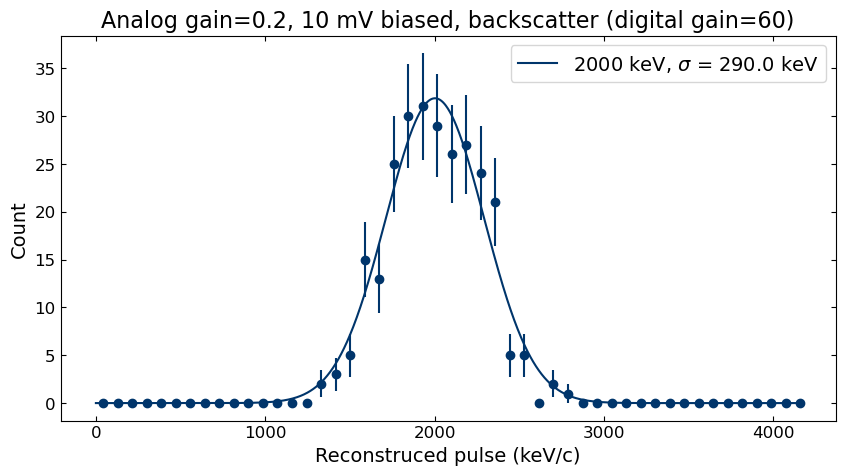

In [123]:
unnormalized_amps = [amps[~np.isnan(amps)] for amps in unnormalized_amps]

norm_factor = pulseamps[-1] / np.mean(unnormalized_amps[-1])
normalized_amps = [amp *norm_factor for amp in unnormalized_amps]

hhs, bcs, gps = fit_amps_gaus(normalized_amps)
plot_gaus_fit(pulseamps, normalized_amps, hhs, bcs, gps, title='Analog gain=0.2, 10 mV biased, backscatter (digital gain=60)')

20240924_5v_2e-8mbar_0_2_analog_gain_backscatter


(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'Analog gain=0.2, 10 mV biased, backscatter (digital gain=60)'}, xlabel='Reconstruced pulse (keV/c)', ylabel='Count'>)

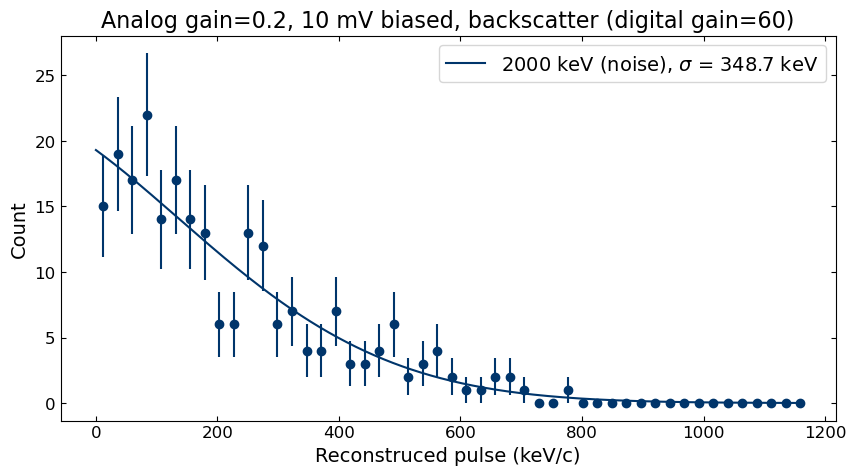

In [124]:
# Fit noise only data
unnormalized_amps_noise = get_unnormalized_amps(folder, datasets, pulseamps, True)

unnormalized_amps_noise = [amps[~np.isnan(amps)] for amps in unnormalized_amps_noise]
normalized_amps_noise = [amp * norm_factor for amp in unnormalized_amps_noise]

hhs, bcs, gps = fit_amps_gaus(normalized_amps_noise)
plot_gaus_fit(pulseamps, normalized_amps_noise, hhs, bcs, gps, True, title='Analog gain=0.2, 10 mV biased, backscatter (digital gain=60)')

In [99]:
5e6 / 40000

125.0

In [6]:
folder = r'/Users/yuhan/work/nanospheres/data/20240924_two_e_data_10mvbiased_backscatter60digitalgain'
dataset = r'20240924_5v_2e-8mbar_0_2_analog_gain_backscatter'
combined_path = os.path.join(folder, dataset, '**/*.mat')
data_files = glob.glob(combined_path)

Text(0, 0.5, 'z position (nm)')

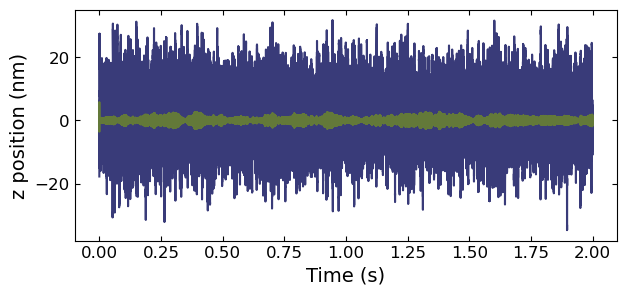

In [81]:
file = data_files[0]
dtt, tt, nn = utils.load_timestreams(file, ['D', 'G'])

fs = int(np.ceil(1/dtt))

zz, dd = nn[0], nn[1]
zz_bp = utils.bandpass_filtered(zz, fs, 40000, 100000)
drive_indices = utils.get_pulse_idx(dd, -0.5, False)

plt.plot(tt, zz*c_mv * 1e9)
plt.plot(tt, zz_bp*c_mv*1e9)
plt.xlabel('Time (s)')
plt.ylabel('z position (nm)')
# plt.plot(tt, dd)

In analysis we take a 200 ms window, estimate frequency in a 4 ms pre-pulse window, and search in a 8 us window.

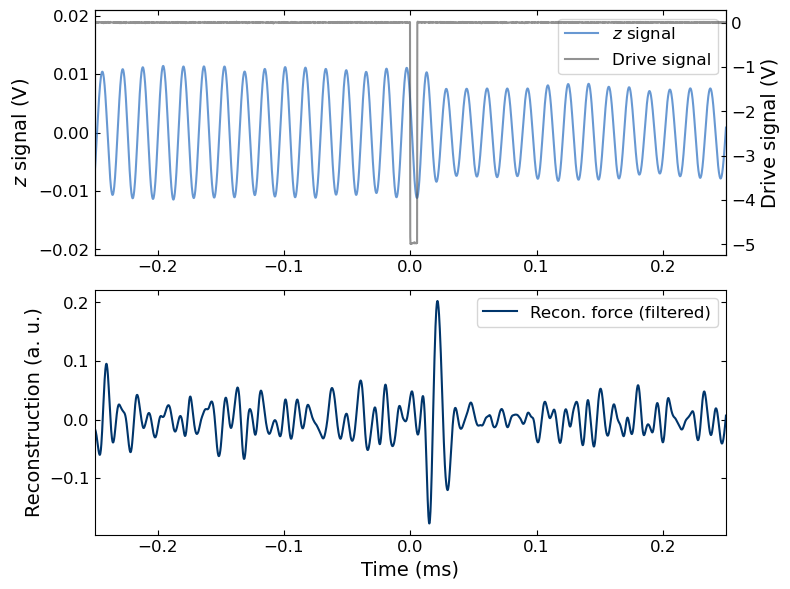

In [27]:
idx = drive_indices[5]
analysis_window, f, f_lp, amp = utils.recon_pulse(idx, dtt, tt, zz_bp, dd, True, None, 500000, 20000, 40, 50)

(-0.0002, 0.0002)

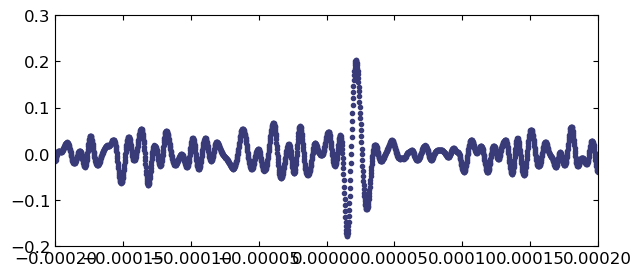

In [29]:
tt_window = tt[analysis_window] - tt[idx]

plt.plot(tt_window, f_lp/1e9, '.')
plt.ylim(-0.2, 0.3)
plt.xlim(-0.2e-3, 0.2e-3)

Take bandpassed filtered data in the 200 ms window and divide them into 4 ms chunks. Estimate the force noise spectrum for each 4 ms chunk (frequency resolution = 250 Hz here).

In [105]:
zz_windowed = zz_bp[analysis_window]

In [106]:
nchunk = 50
size_per_chunk = int(zz_windowed.size / nchunk)
ffs, pps = [], []

passband = [40000, 100000]
for i in range(nchunk):
    zz = zz_bp[i*size_per_chunk : (i+1)*size_per_chunk]    
#     zzk = rfft(zz)
#     pp = np.abs(zzk) ** 2
#     ff = rfftfreq(size_per_chunk, dtt)
    ff, pp = utils.get_psd(dt=dtt, zz=zz, nperseg=2**16)

    all_idx = np.logical_and(ff > passband[0], ff < passband[1])
    ffs.append(ff[all_idx])
    pps.append(pp[all_idx])

In [107]:
gamma = 250 * 2 * np.pi

sf_all = []
sig_p = np.empty(len(ffs))
nphonons = np.empty(len(ffs))
for i, ff in enumerate(ffs):
    pp = pps[i]
    sz = pp * (c_mv**2)
    
    omega = ff * 2 * np.pi
    omega0 = omega[np.argmax(pp)]
    
    chi = (1 / m) / (omega0**2 - omega**2 - gamma * omega * 1j)
    sf = sz / (np.abs(chi) * np.abs(chi))
    
    sf_all.append(sf)
    sig_p[i] = np.sqrt(1/(np.trapz(1/sf, x=omega)/(2*np.pi))) * SI2ev / 1000
    nphonons[i] = np.trapz(sz, x=omega)/(2*np.pi) * 0.5 * omega0**2 * m / (hbar * omega0)

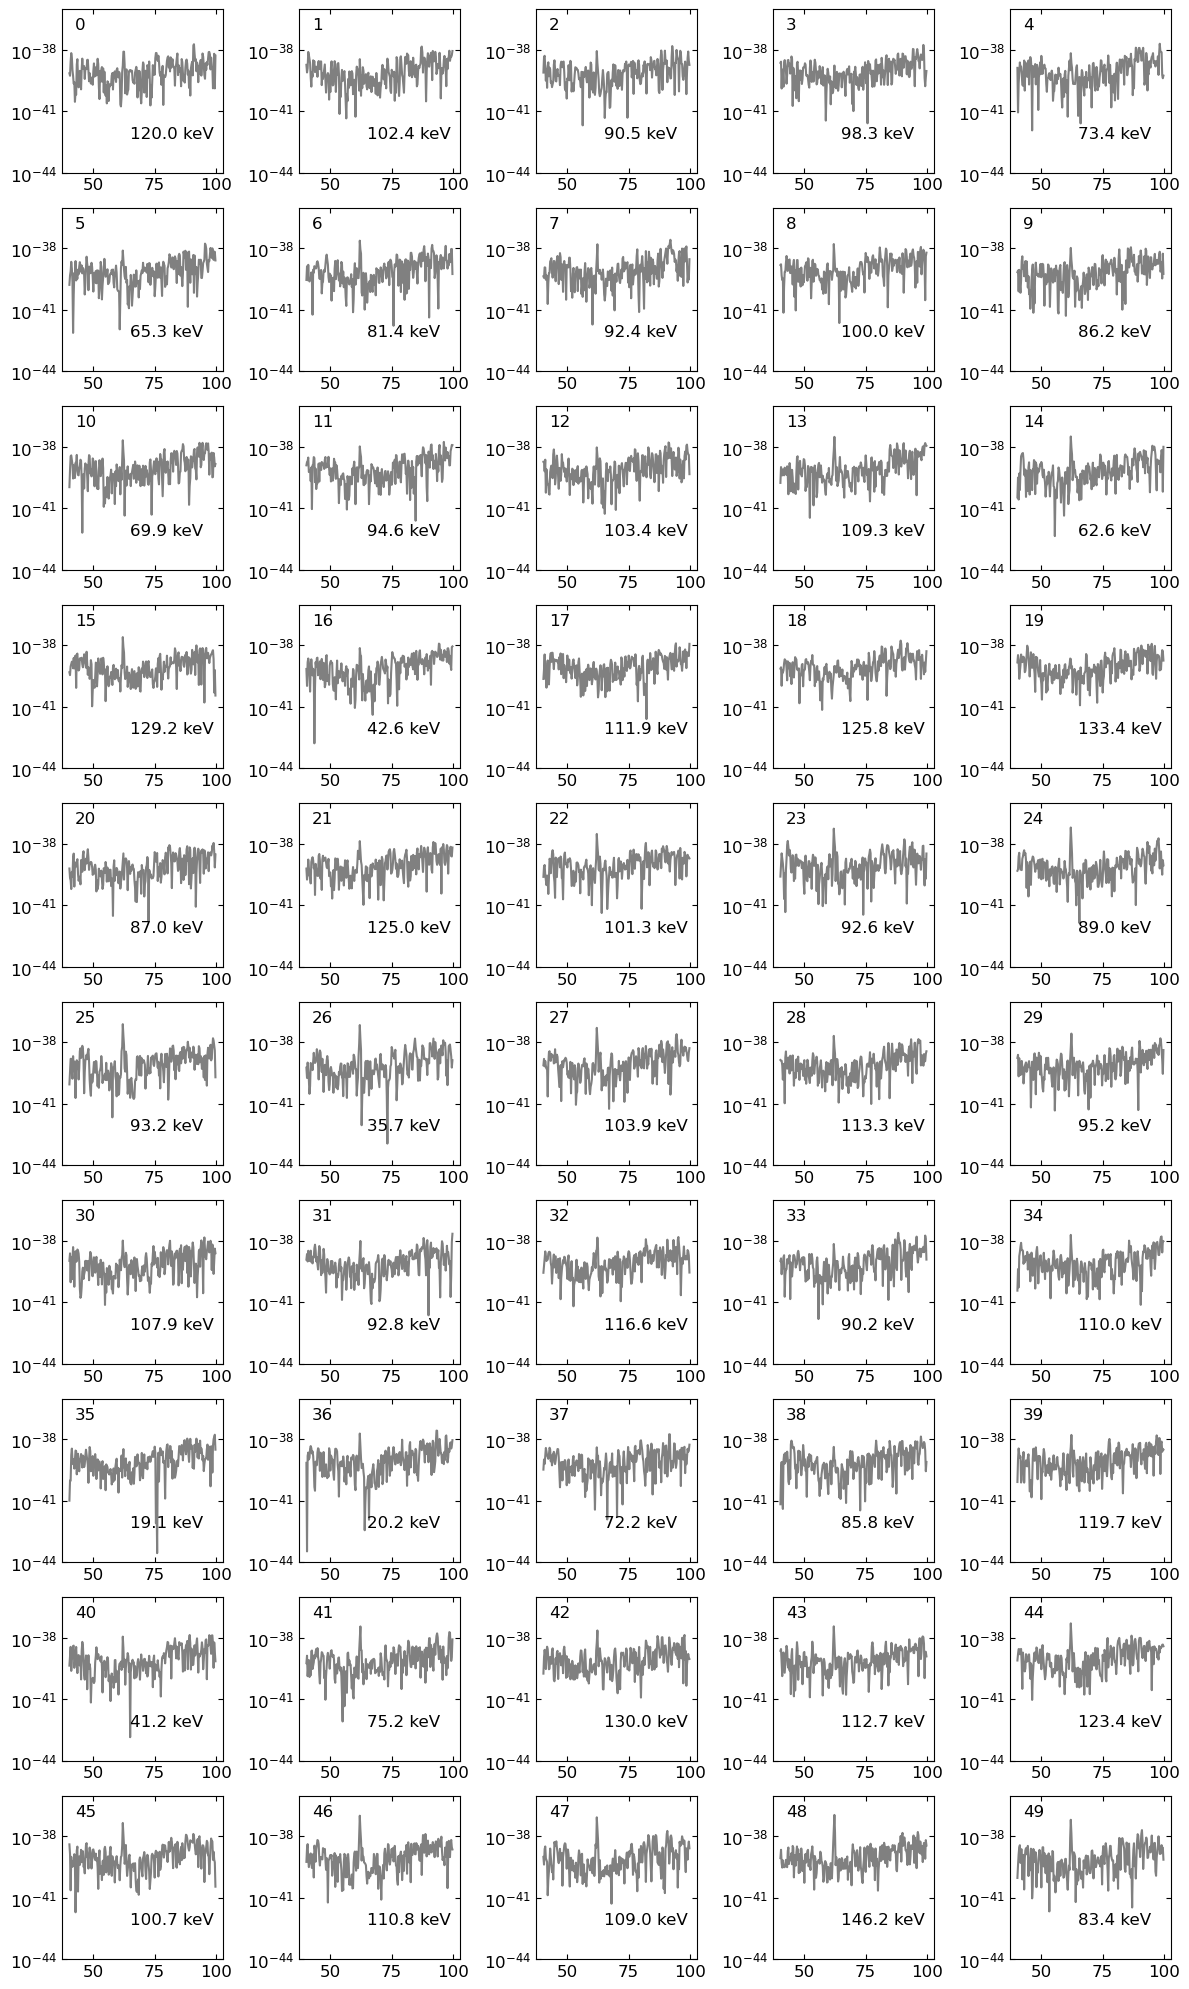

In [125]:
fig, axes = plt.subplots(10, 5, figsize=(12, 20))
for i, ax in enumerate(axes.flatten()):
    ax.plot(ffs[0]/1000, sf_all[i], color='grey')
    
    ax.text(42.5, 1e-37, f'{i}', fontsize=12)
    ax.text(65, 5e-43, f'{sig_p[i]:.1f} keV', fontsize=12)
    
    ax.set_yscale('log')
    ax.set_ylim(1e-44, 1e-36)
fig.tight_layout()

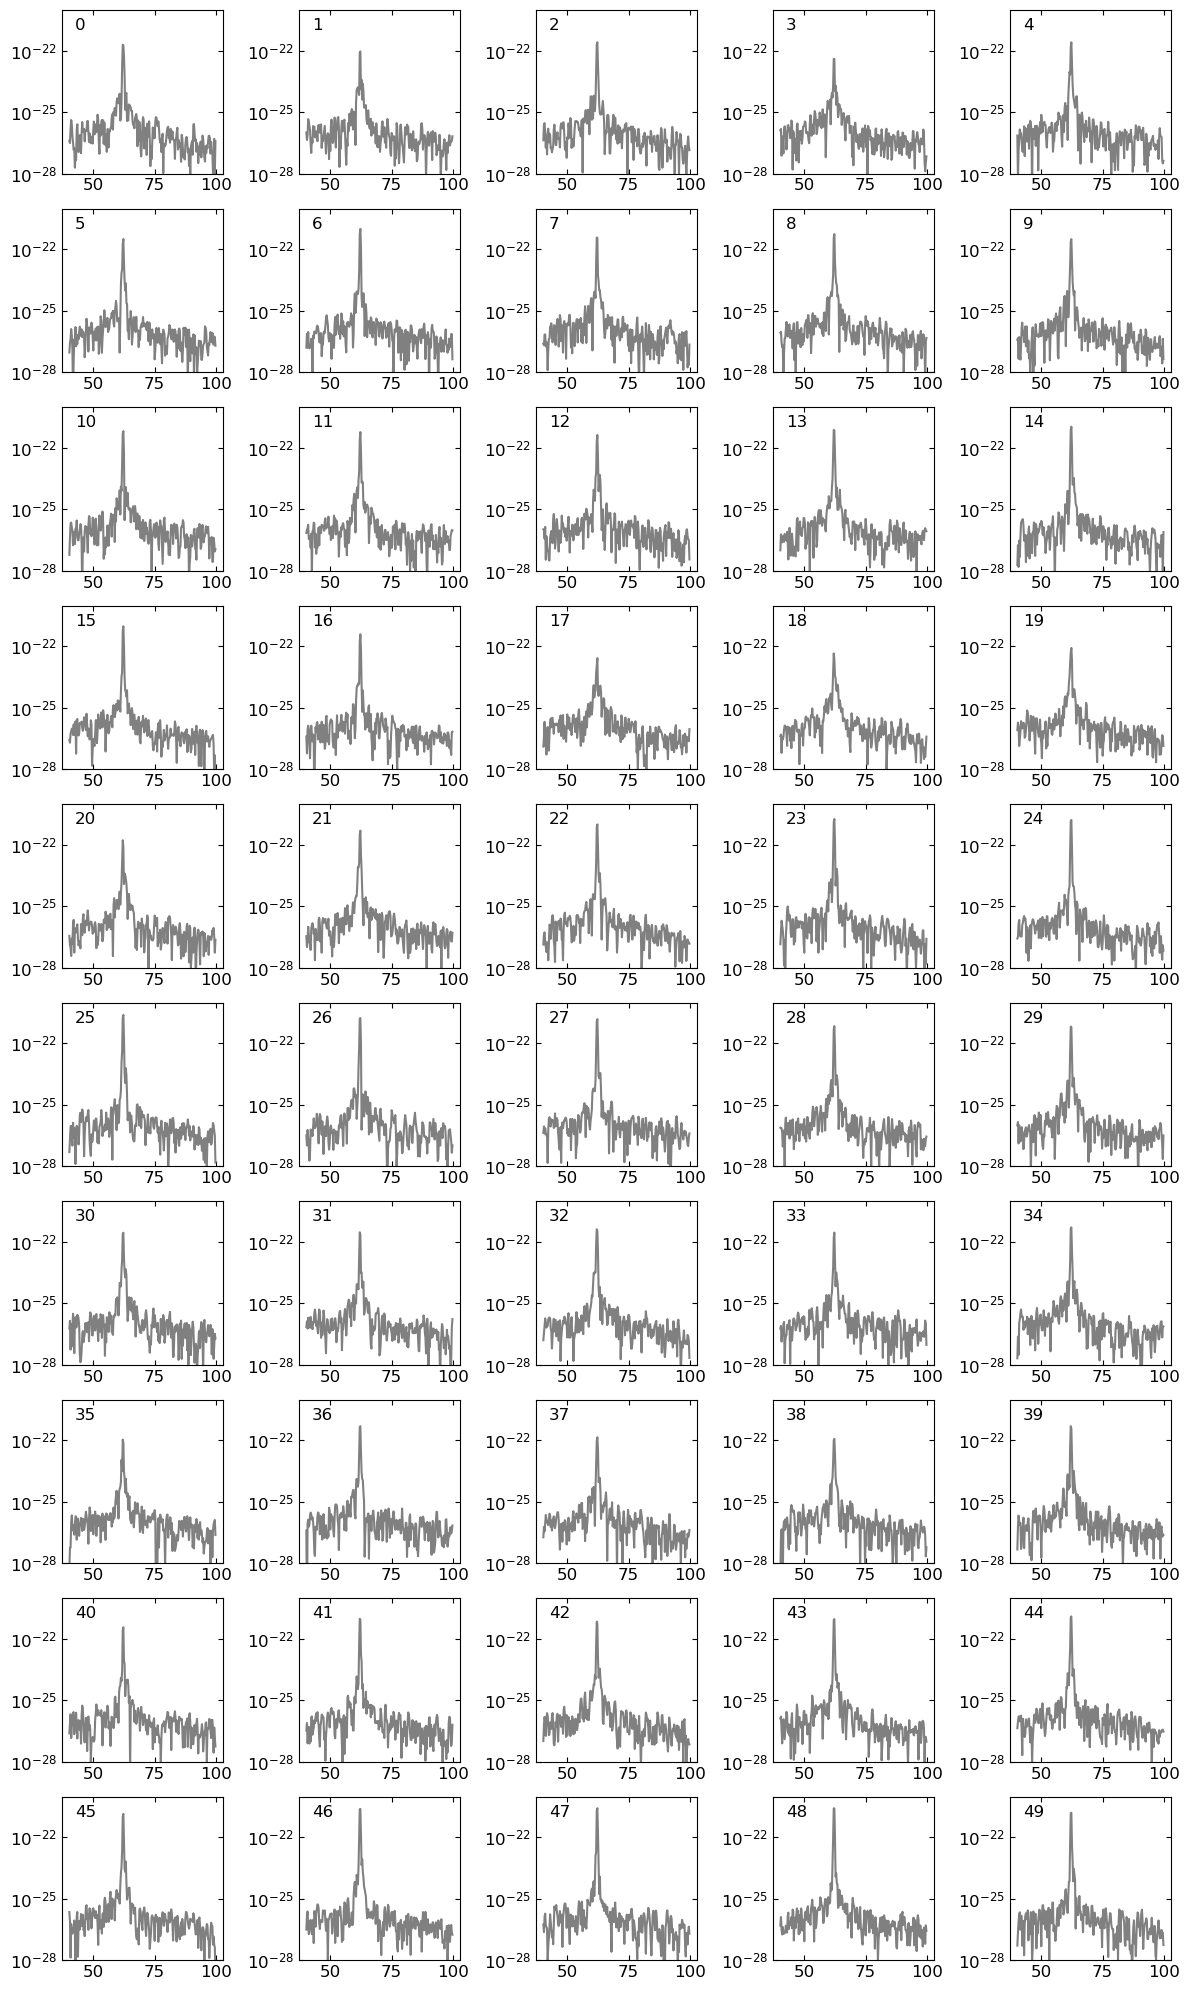

In [109]:
fig, axes = plt.subplots(10, 5, figsize=(12, 20))
for i, ax in enumerate(axes.flatten()):
    ax.plot(ffs[0]/1000, pps[i]*(c_mv**2), color='grey')
    
    ax.text(42.5, 1e-21, f'{i}', fontsize=12)
#     ax.text(70, 5e-43, f'{sig_p[i]:.1f} keV', fontsize=12)
    
    ax.set_yscale('log')
    ax.set_ylim(1e-28, 1e-20)
fig.tight_layout()

Text(0, 0.5, 'Estimated force noice \n(keV/c)')

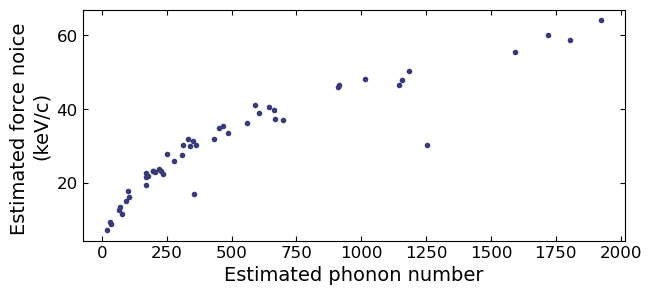

In [49]:
plt.plot(nphonons, sig_p, '.')
plt.xlabel('Estimated phonon number')
plt.ylabel('Estimated force noice \n(keV/c)')
# plt.xscale('log')

Estimate temperature right before the pulse and correlate with the reconstructed amplitudes

In [63]:
from scipy.stats import moment

passband = [40000, 100000]
noise_floor_passband = [140000, 180000]

noise_temp = []
noise_floor = []
omega0s = []

for file in data_files:
    dtt, tt, nn = utils.load_timestreams(file, ['D', 'G'])

    fs = int(np.ceil(1/dtt))

    zz, dd = nn[0], nn[1]
    zz_bp = utils.bandpass_filtered(zz, fs, 40000, 100000)
    drive_indices = utils.get_pulse_idx(dd, -0.5, False)

    for idx in drive_indices:
        if idx < 100000 or idx > tt.size-100000:
            continue
            
        prepulse_window = utils.get_prepulse_window(tt, idx, length=20000)
        _zz = zz[prepulse_window]
        ff, pp = utils.get_psd(dt=dtt, zz=_zz, nperseg=2**18)
#         zzk = rfft(zz[prepulse_window])
#         ff = rfftfreq(zz[prepulse_window].size, dtt)
    
        all_idx = np.logical_and(ff > passband[0], ff < passband[1])
        omega = ff[all_idx] * 2 * np.pi
        omega0 = omega[np.argmax(pp[all_idx])]        
        nphonon = np.trapz(pp[all_idx]*c_mv**2, x=omega)/(2*np.pi) * 0.5 * omega0**2 * m / (hbar * omega0)
        
        noise_idx = np.logical_and(ff > noise_floor_passband[0], ff < noise_floor_passband[1])
        
        noise_temp.append(nphonon)
        omega0s.append(omega0)
        noise_floor.append(np.sum(pp[noise_idx]))

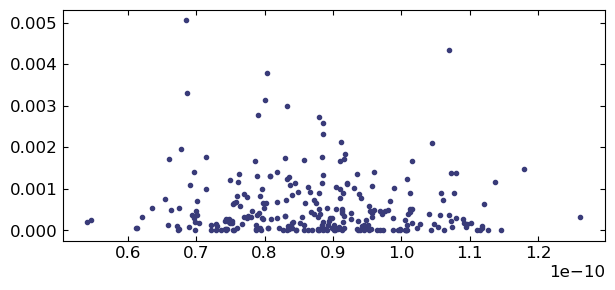

In [64]:
plt.plot(noise_floor, (unnormalized_amps[0]-np.mean(unnormalized_amps[0]))**2, '.')

(0.0, 2000.0)

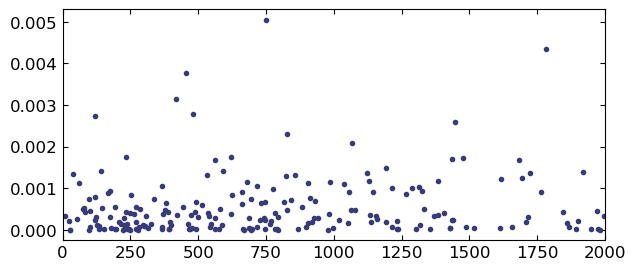

In [51]:
plt.plot(noise_temp, (unnormalized_amps[0] - np.mean(unnormalized_amps[0]))**2 , '.')
plt.xlim(0, 2000)

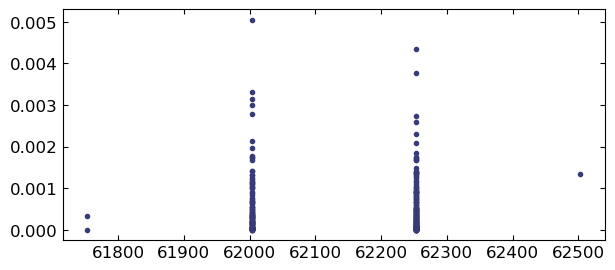

In [53]:
plt.plot(np.asarray(omega0s)/(2*np.pi), (unnormalized_amps[0] - np.mean(unnormalized_amps[0]))**2, '.')

Estimate noise level away from the pulses and see if that agrees with optimal filter reconstruction

In [19]:
f_lps = []
for file in data_files[:1]:
    dtt, tt, nn = utils.load_timestreams(file, ['D', 'G'])

    fs = int(np.ceil(1/dtt))

    zz, dd = nn[0], nn[1]
    zz_bp = utils.bandpass_filtered(zz, fs, 40000, 100000)
    drive_indices = utils.get_pulse_idx(dd, -0.5, False)
    noise_indices = 0.5 * (drive_indices[1:] + drive_indices[:-1])
    
    for idx in noise_indices:
        idx = int(idx)
        if idx < 500000 or idx > tt.size-500000:
                continue
        window, f, f_lp, amp = utils.recon_pulse(idx, dtt, tt, zz_bp, dd, False, None, 500000, 40000, 40, 30)
        f_lps.append(f_lp)

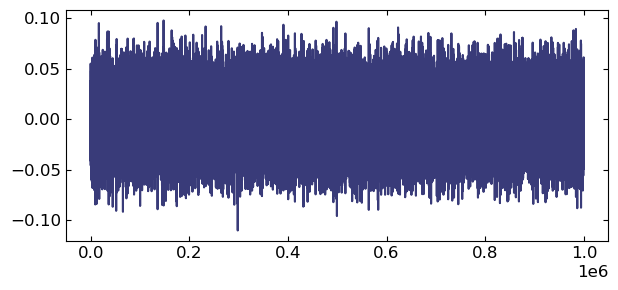

In [25]:
plt.plot(f_lps[0][100:]/1e9)